In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['figure.figsize'] = (9,6)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
H0 = np.diag([0,1,2,3])

In [23]:
# Störterm

# Die Matrix unten wurde als symmetrische Gaussche Zufallsmatrix so generiert

W = np.random.normal(size = (4,4))
W = .5*(W+W.transpose())

# Hier ist eine spezifische Störung. 
# Um andere zu testen, bitte auskommentieren.

W = np.array([[-0.37719925, -0.33899474, -0.47715234,  0.86603133],
   [-0.33899474,  0.87279313, -0.11048619,  0.09288698],
   [-0.47715234, -0.11048619, -1.22835676,  1.89247176],
   [ 0.86603133,  0.09288698,  1.89247176,  0.7198324 ]])

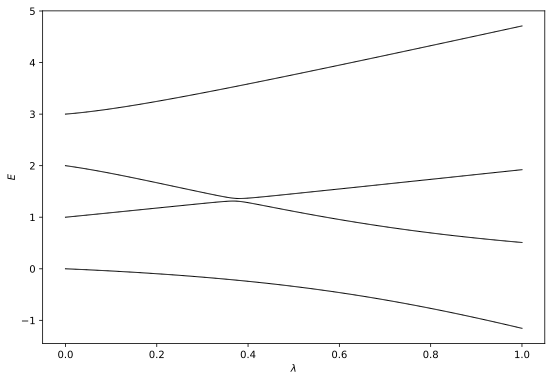

In [26]:
# Plotte Eigenwerte als Funktion des Störparameters lambda

N = 500
lambdamax = 1.0

lam = np.linspace(0, lambdamax, N)
lamrepeated = np.kron(lam, [1]*4)

# Hier werden die Eigenwerte berechnet
Es = np.array([np.sort(np.linalg.eigvals(H0 + l*W)) for l in lam]).flatten()

plt.plot(lamrepeated, Es, ',k')
plt.xlabel("$\\lambda$")
plt.ylabel("$E$");


Bei $\lambda\simeq.4$ sieht man ein interessantes Phänomen: ein "[avoided level crossing](https://en.wikipedia.org/wiki/Avoided_crossing)". Man kann das theoretisch erklären - dies ist aber nicht unser Thema hier.

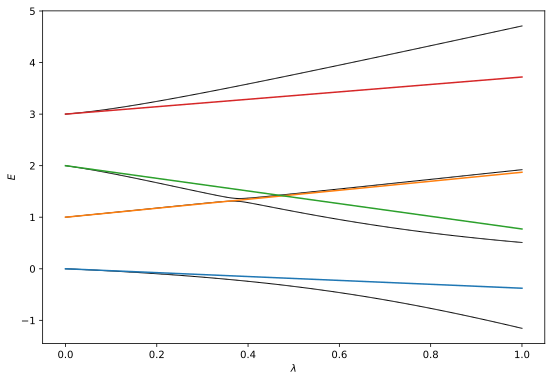

In [27]:
# Vergleich mit erster Ordnung Störtheorie

plt.plot(lamrepeated, Es, ',k') 

for i in range(4): 
    plt.plot(lam, i + W[i,i]*lam) 
    
plt.xlabel("$\\lambda$")
plt.ylabel("$E$");

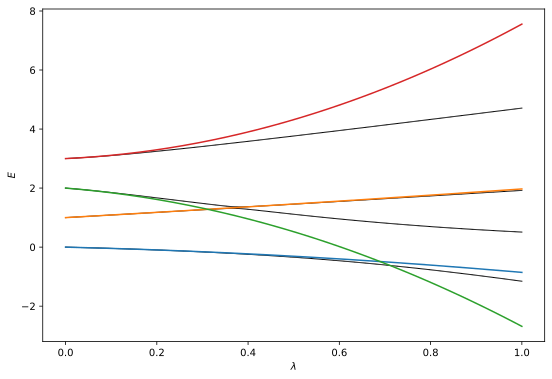

In [28]:
# Vergleich mit zweiter Ordnung Störtheorie

plt.plot(lamrepeated, Es, ',k') 

for i in range(4): 
    plt.plot(lam, i + W[i,i]*lam - sum([0 if i==j else W[j,i]**2/(j - i)*lam**2 for j in range(4)])) 
    
plt.xlabel("$\\lambda$")
plt.ylabel("$E$");

Für endliche Werte des Störparameters ist *nicht garantiert*, dass die Qualität der Näherung monoton mit der Ordnung besser wird. Für reale Probleme benutzt man Störtheorie natürlich immer dann, wenn die wahren Eigenwerte zu schwer zu berechnen sind. Man befindet sich dann in der unangenehmen Situation, dass man a) die Qualität der Näherung nicht streng abschätzen kann, und, schlimmer, b) sich die Qualität nicht einmal sicher verbessert, wenn man mit viel Arbeit höhere Ordnungen ausrechnet. Eine gute allgemeine Lösung für dieses Problem gibt es leider nicht.

# Ein entarteter Eigenwert

In [29]:
H0 = np.diag([0,1,2,2,3])

In [70]:
# Störterm

W = np.random.normal(size = (5,5))
W = .5*(W+W.transpose())

# Hier ist eine spezifische Störung. 
# Um andere zu testen, bitte auskommentieren.

W = np.array([[ 0.20703337, -0.3677102 ,  0.04175711, -0.10868513,  0.11413083],
       [-0.3677102 ,  0.40490935,  0.21528411,  0.74399086,  1.10930758],
       [ 0.04175711,  0.21528411,  0.9731671 , -0.93868919, -0.46906016],
       [-0.10868513,  0.74399086, -0.93868919,  0.84096587, -1.9900538 ],
       [ 0.11413083,  1.10930758, -0.46906016, -1.9900538 , -1.06544498]])

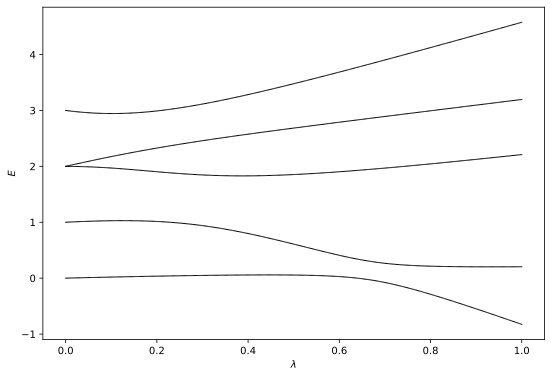

In [63]:
# Plotte Eigenwerte als Funktion des Störparameters lambda

N = 500
lambdamax = 1.0

lam = np.linspace(0, lambdamax, N)
lamrepeated = np.kron(lam, [1]*5)

# Hier werden die Eigenwerte berechnet
Es = np.array([np.sort(np.linalg.eigvals(H0 + l*W)) for l in lam]).flatten()

plt.plot(lamrepeated, Es, ',k')
plt.xlabel("$\\lambda$")
plt.ylabel("$E$");


Die Störung hebt die Entartung auf.

In [72]:
# Eigenwerte der Einschränkung der Störmatrix auf den entarteten Eigenraum

W2 = W[2:4,2:4]
E1 = np.linalg.eig(W2)[0]
E1

array([ 1.84808013, -0.03394716])

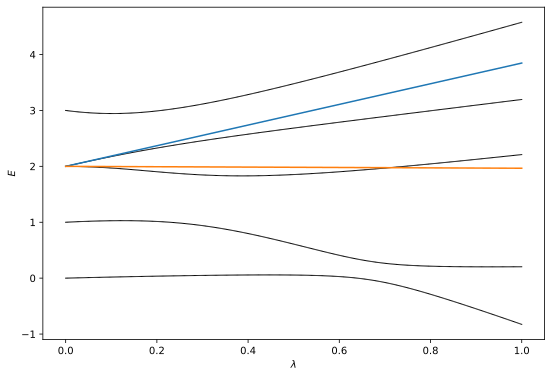

In [73]:
# Vergleich mit erster Ordnung Störtheorie

plt.plot(lamrepeated, Es, ',k') 

for i in range(2): 
    plt.plot(lam, 2 + E1[i]*lam) 
    
plt.xlabel("$\\lambda$")
plt.ylabel("$E$");